## decision trees - random forest

We will revisit Parkinson's data set, this time applying a decision tree and random forest model to see how the accuracy differs between the two and ultimately compares to the logistic regression model used in an earlier project.

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

In [27]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

# These are the models we'll be using.
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

Load the data and drop the name column

In [2]:
df_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/parkinsons.data')

In [3]:
df_data.drop(columns=['name'], inplace=True)

In [6]:
df_data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Assign X and y and create our model. First we will use a decision tree, then expand into a simple random forest.

In [7]:
X = df_data.drop(columns=['status'])
y = df_data['status']

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


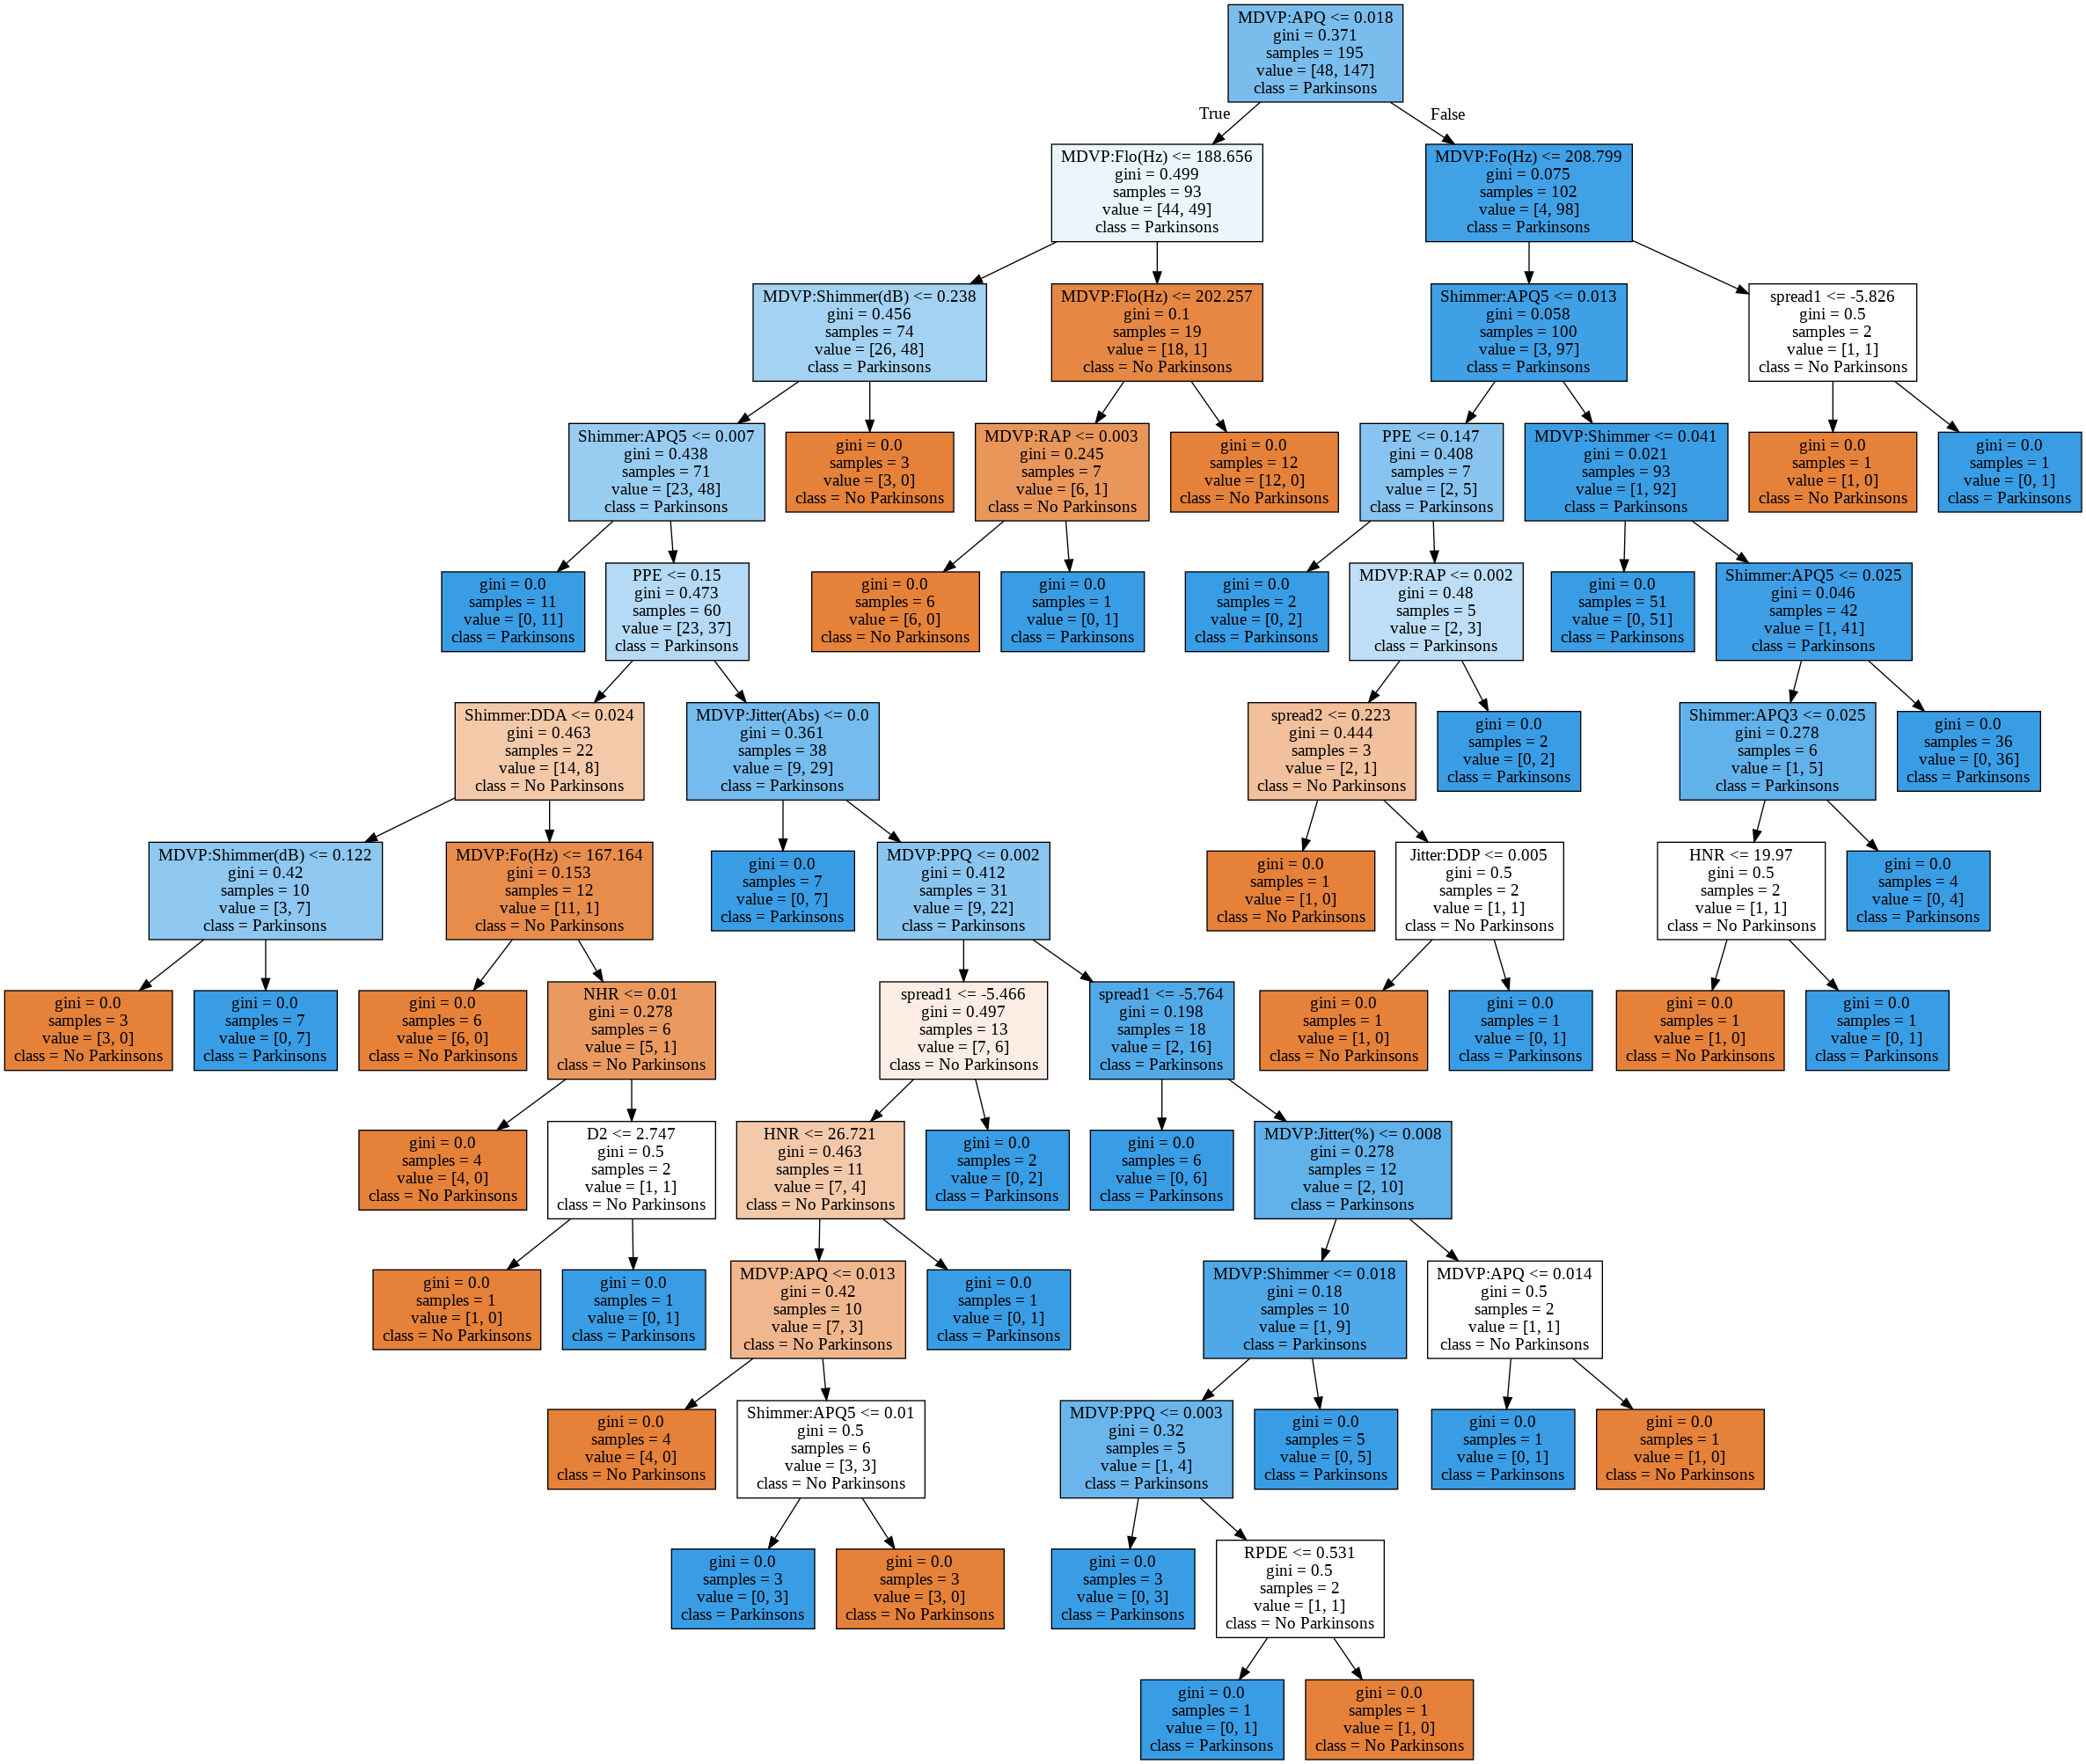

In [38]:
%time
# Initialize and train our tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=1,
    max_depth=None,
    random_state=20 
)

decision_tree.fit(X, y)

# Render our tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['No Parkinsons', 'Parkinsons'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [34]:
dt_acc = cross_val_score(decision_tree, X, y, cv=10)
dt_acc

array([0.65      , 1.        , 0.75      , 0.85      , 0.9       ,
       0.78947368, 0.63157895, 0.73684211, 0.73684211, 0.63157895])

Not very accurate. Let's see if a Random Forest (collection of decision trees) can improve this.

In [39]:
%time
rfc = ensemble.RandomForestClassifier()
rfc_acc = cross_val_score(rfc, X, y, cv=10)
rfc_acc

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


array([0.7       , 0.95      , 0.9       , 0.95      , 1.        ,
       0.78947368, 0.89473684, 0.68421053, 0.84210526, 0.73684211])

Much better numbers. Remember, our logistic regression model from before scored around 80%. However we did not use cross_val_score to test accuracy. Let's recreat that model and do that now.

In [31]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=20)
lr_acc = cross_val_score(lr_regularized, X, y, cv=10)
lr_acc

array([1.        , 0.9       , 0.75      , 0.9       , 1.        ,
       0.68421053, 0.84210526, 0.73684211, 0.78947368, 0.78947368])

The logistic regression model still appears to be performing better. Let's average our results from cross validation to confirm.

In [35]:
dt_acc.mean()

0.7676315789473683

In [37]:
 rfc_acc.mean()

0.8284210526315791

In [33]:
lr_acc.mean()

0.8392105263157894

Unless improvements are made to the random forest model, it is outperformed by the logistic regression model. 